## 配置图例

`plt.legend()`创建最简单的图例

In [4]:
import matplotlib.pyplot as plt 
import numpy as np


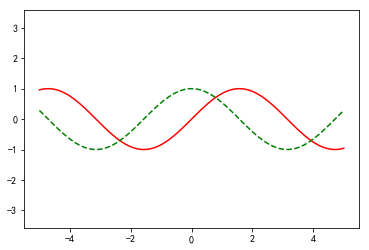

In [5]:
%matplotlib inline 
x = np.linspace(-5, 5, 100)
fig, ax = plt.subplots(1)
ax.plot(x, np.sin(x), '-r', label='sin')
ax.plot(x, np.cos(x), '--g', label='cos')
ax.axis('equal')
fig.show()

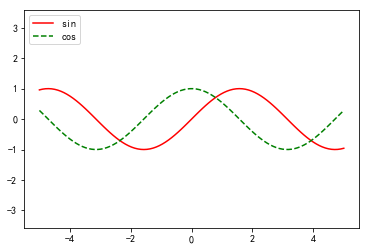

In [6]:
ax.legend(loc='upper left')
fig

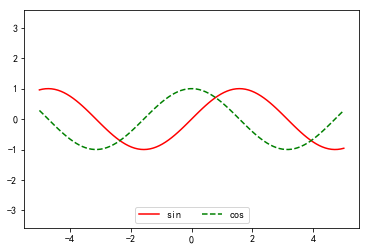

In [7]:
# 设置标签列数， ncol
ax.legend(loc='lower center', ncol=2)
fig

还可以为图例定义圆角边框（fancybox） 、 增加阴影、 改变外边框透
明度（framealpha 值） ， 或者改变文字间距

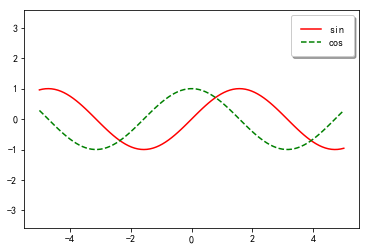

In [9]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

### 选择图例显示的元素

plt.plot() 命令可以一次创建多条线， 返回线条实例列表

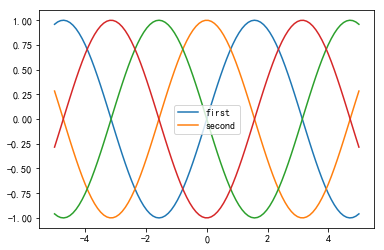

In [12]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
plt.legend(lines[:2], ['first', 'second'])

### 在图例中显示不同尺寸的点

用不同尺寸的点代表不同的人口数量

In [15]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv', index_col=0)
cities.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [93]:
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

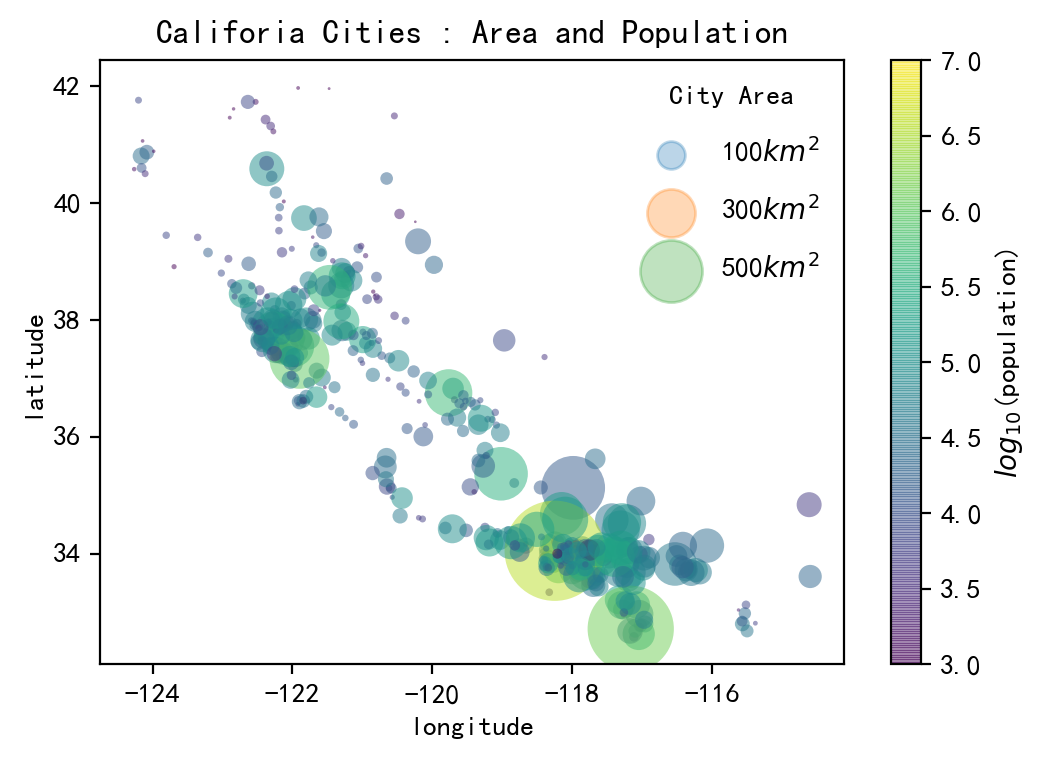

In [61]:
plt.figure(dpi=200)
# 根据(经度，维度)绘制散点图，颜色为人口去对数，散点的大小为面积，
plt.scatter(lon, lat, c=np.log10(population),label=None,
           s=area, linewidth=0, alpha=0.5, cmap='viridis')
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Califoria Cities : Area and Population')
plt.colorbar(label='$log_{10}$(population)')
plt.clim(3,7)

# 创建图例标签
# 原理是：用图标签表示原图标签
for area in [100,300,500]:
    plt.scatter([],[],alpha=0.3, s=area,
               label='{}$km^2$'.format(area))
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')

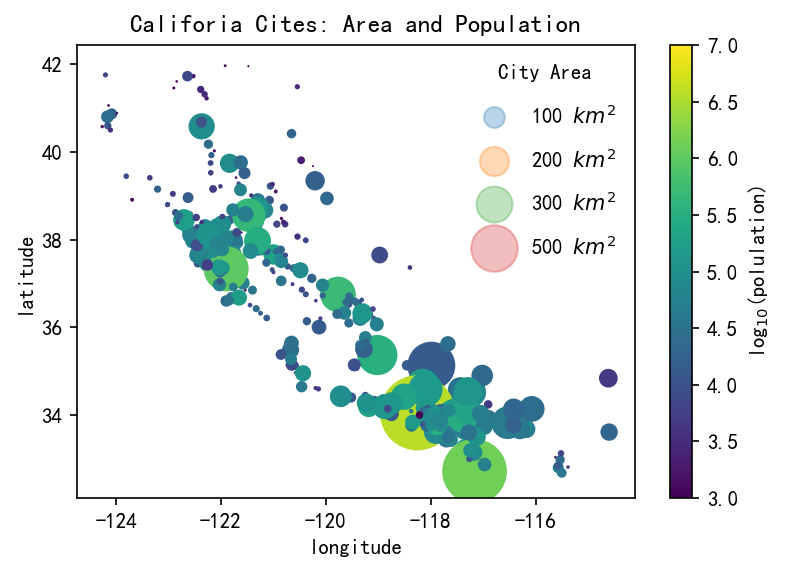

In [73]:
population, area = cities['population_total'], cities['area_total_km2']
plt.figure(dpi=150)
plt.scatter(lon, lat, label=None, c=np.log10(population),
           s=area, linewidth=0, cmap='viridis')
plt.colorbar(label='log$_{10}$(polulation)')
plt.title('Califoria Cites: Area and Population')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.clim(3,7)
for area in [100, 200, 300, 500]:
    plt.scatter([],[],alpha=0.3, s=area, label='{} $km^2$'.format(area))
    plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
    

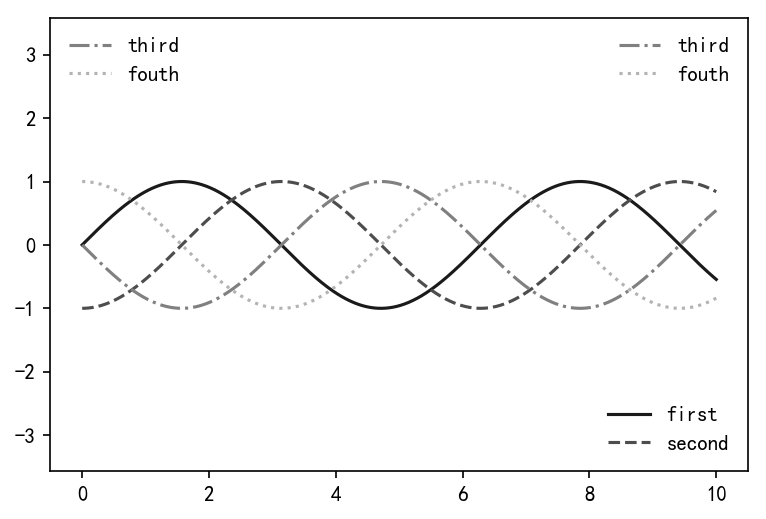

In [151]:
fig, ax = plt.subplots()
fig.dpi=150
lines = []
style = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines.extend((ax.plot(x, np.sin(x - i * np.pi/2),
                     style[i], c='{}'.format(0.1+i*0.2))))
# 设置第一个图例
ax.axis('equal')
ax.legend(lines[:2], ['first', 'second'], loc='lower right', frameon=False)

# 设置第二个图例
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['third', 'fouth'], loc='upper right', frameon=False)
leg2 = Legend(ax, lines[2:], ['third', 'fouth'], loc='upper left', frameon=False)

ax.add_artist(leg)
ax.add_artist(leg2)